In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
from PIL import Image

# Read files using file name from the csv and add corresponding image in a pandas dataframe along with labels
skin_df = pd.read_csv(r'E:\Softnerve Technology Private Limited\archive\HAM10000_metadata.csv')

#Now time to read images based on image ID from the CSV file
image_path = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(r'E:\Softnerve Technology Private Limited\archive', '*', '*.jpg'))}

#Define the path and add as a new column
skin_df['path'] = skin_df['image_id'].map(image_path.get)

#Use the path to read images
skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((32,32))))

print(skin_df['dx'].value_counts())

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


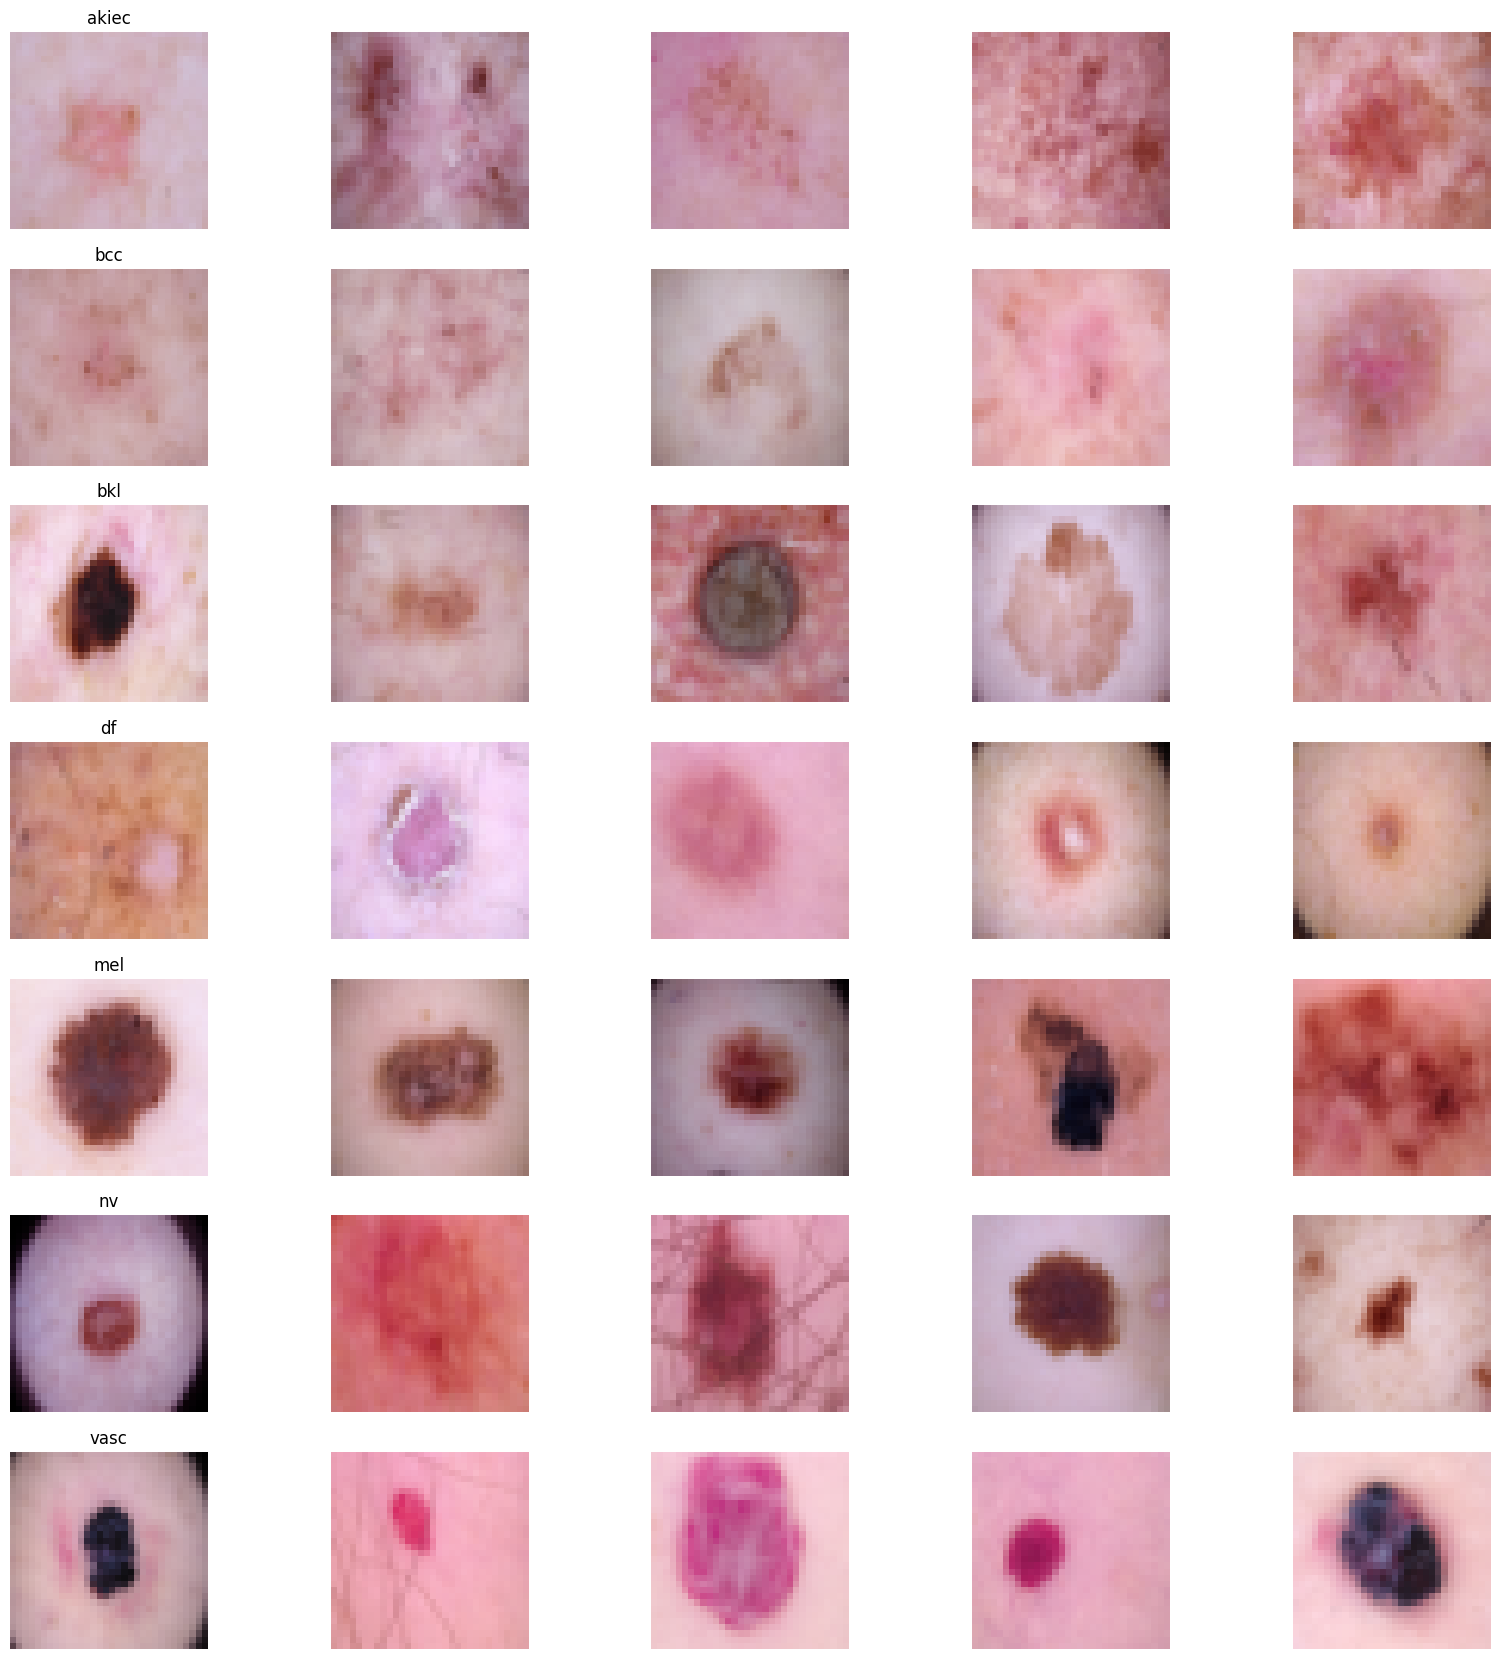

In [3]:
n_samples = 5  # number of samples for plotting
# Plotting
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         skin_df.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image

np.random.seed(42)
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import autokeras as ak


In [5]:
skin_df = pd.read_csv(r'E:\Softnerve Technology Private Limited\archive\HAM10000_metadata.csv')

SIZE=32

# label encoding to numeric values from text
le = LabelEncoder()
le.fit(skin_df['dx'])
LabelEncoder()
print(list(le.classes_))
 
skin_df['label'] = le.transform(skin_df["dx"]) 
print(skin_df.sample(10))

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
        lesion_id      image_id   dx    dx_type   age     sex   
1617  HAM_0007180  ISIC_0033272  mel      histo  65.0    male  \
8128  HAM_0007195  ISIC_0031923   nv      histo  40.0  female   
2168  HAM_0001835  ISIC_0026652  mel      histo  65.0    male   
1090  HAM_0000465  ISIC_0030583  bkl  consensus  35.0  female   
7754  HAM_0001720  ISIC_0034010   nv      histo  45.0    male   
8071  HAM_0006333  ISIC_0024424   nv      histo  35.0    male   
7423  HAM_0004548  ISIC_0032832   nv      histo  45.0  female   
8984  HAM_0006526  ISIC_0026671   nv      histo  55.0    male   
2310  HAM_0003102  ISIC_0032389  mel      histo  65.0    male   
7256  HAM_0004260  ISIC_0025525   nv      histo  65.0    male   

         localization  label  
1617             face      4  
8128  lower extremity      5  
2168             back      4  
1090            trunk      2  
7754          abdomen      5  
8071            trunk      5  
7423  upper extr

C:\Users\jeeva\AppData\Local\Temp\ipykernel_20612\1708716595.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_age['age'], fit=stats.norm, color='red');


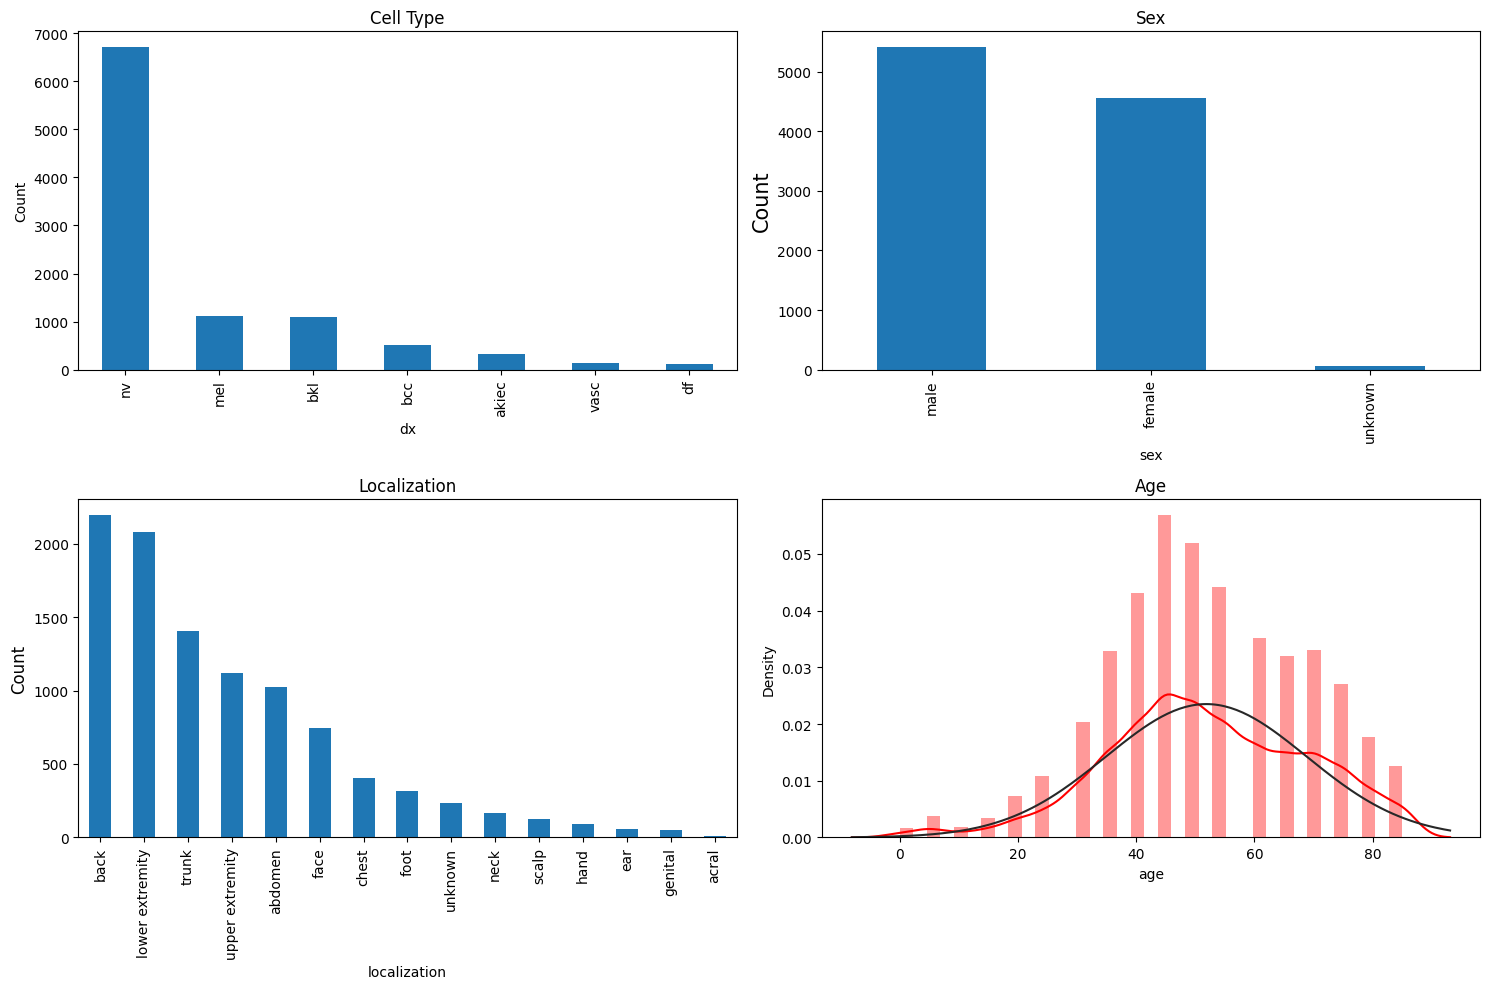

In [6]:
# Data distribution visualization
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(221)
skin_df['dx'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Cell Type');

ax2 = fig.add_subplot(222)
skin_df['sex'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_ylabel('Count', size=15)
ax2.set_title('Sex');

ax3 = fig.add_subplot(223)
skin_df['localization'].value_counts().plot(kind='bar')
ax3.set_ylabel('Count',size=12)
ax3.set_title('Localization')


ax4 = fig.add_subplot(224)
sample_age = skin_df[pd.notnull(skin_df['age'])]
sns.distplot(sample_age['age'], fit=stats.norm, color='red');
ax4.set_title('Age')

plt.tight_layout()
plt.show()


In [7]:
# Distribution of data into various classes 
from sklearn.utils import resample
print(skin_df['label'].value_counts())

label
5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: count, dtype: int64


In [8]:
#Balance data
#Separate each classes, resample, and combine back into single dataframe
df_0 = skin_df[skin_df['label'] == 0]
df_1 = skin_df[skin_df['label'] == 1]
df_2 = skin_df[skin_df['label'] == 2]
df_3 = skin_df[skin_df['label'] == 3]
df_4 = skin_df[skin_df['label'] == 4]
df_5 = skin_df[skin_df['label'] == 5]
df_6 = skin_df[skin_df['label'] == 6]

n_samples=500 
df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=42) 
df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=42) 
df_2_balanced = resample(df_2, replace=True, n_samples=n_samples, random_state=42)
df_3_balanced = resample(df_3, replace=True, n_samples=n_samples, random_state=42)
df_4_balanced = resample(df_4, replace=True, n_samples=n_samples, random_state=42)
df_5_balanced = resample(df_5, replace=True, n_samples=n_samples, random_state=42)
df_6_balanced = resample(df_6, replace=True, n_samples=n_samples, random_state=42)

skin_df_balanced = pd.concat([df_0_balanced, df_1_balanced, 
                              df_2_balanced, df_3_balanced, 
                              df_4_balanced, df_5_balanced, df_6_balanced])

In [9]:
#Now time to read images based on image ID from the CSV file
print(skin_df_balanced['label'].value_counts())


image_path = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(r'E:\Softnerve Technology Private Limited\archive', '*', '*.jpg'))}
#Define the path and add as a new column
skin_df_balanced['path'] = skin_df['image_id'].map(image_path.get)
#Use the path to read images.
skin_df_balanced['image'] = skin_df_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE))))

label
0    500
1    500
2    500
3    500
4    500
5    500
6    500
Name: count, dtype: int64


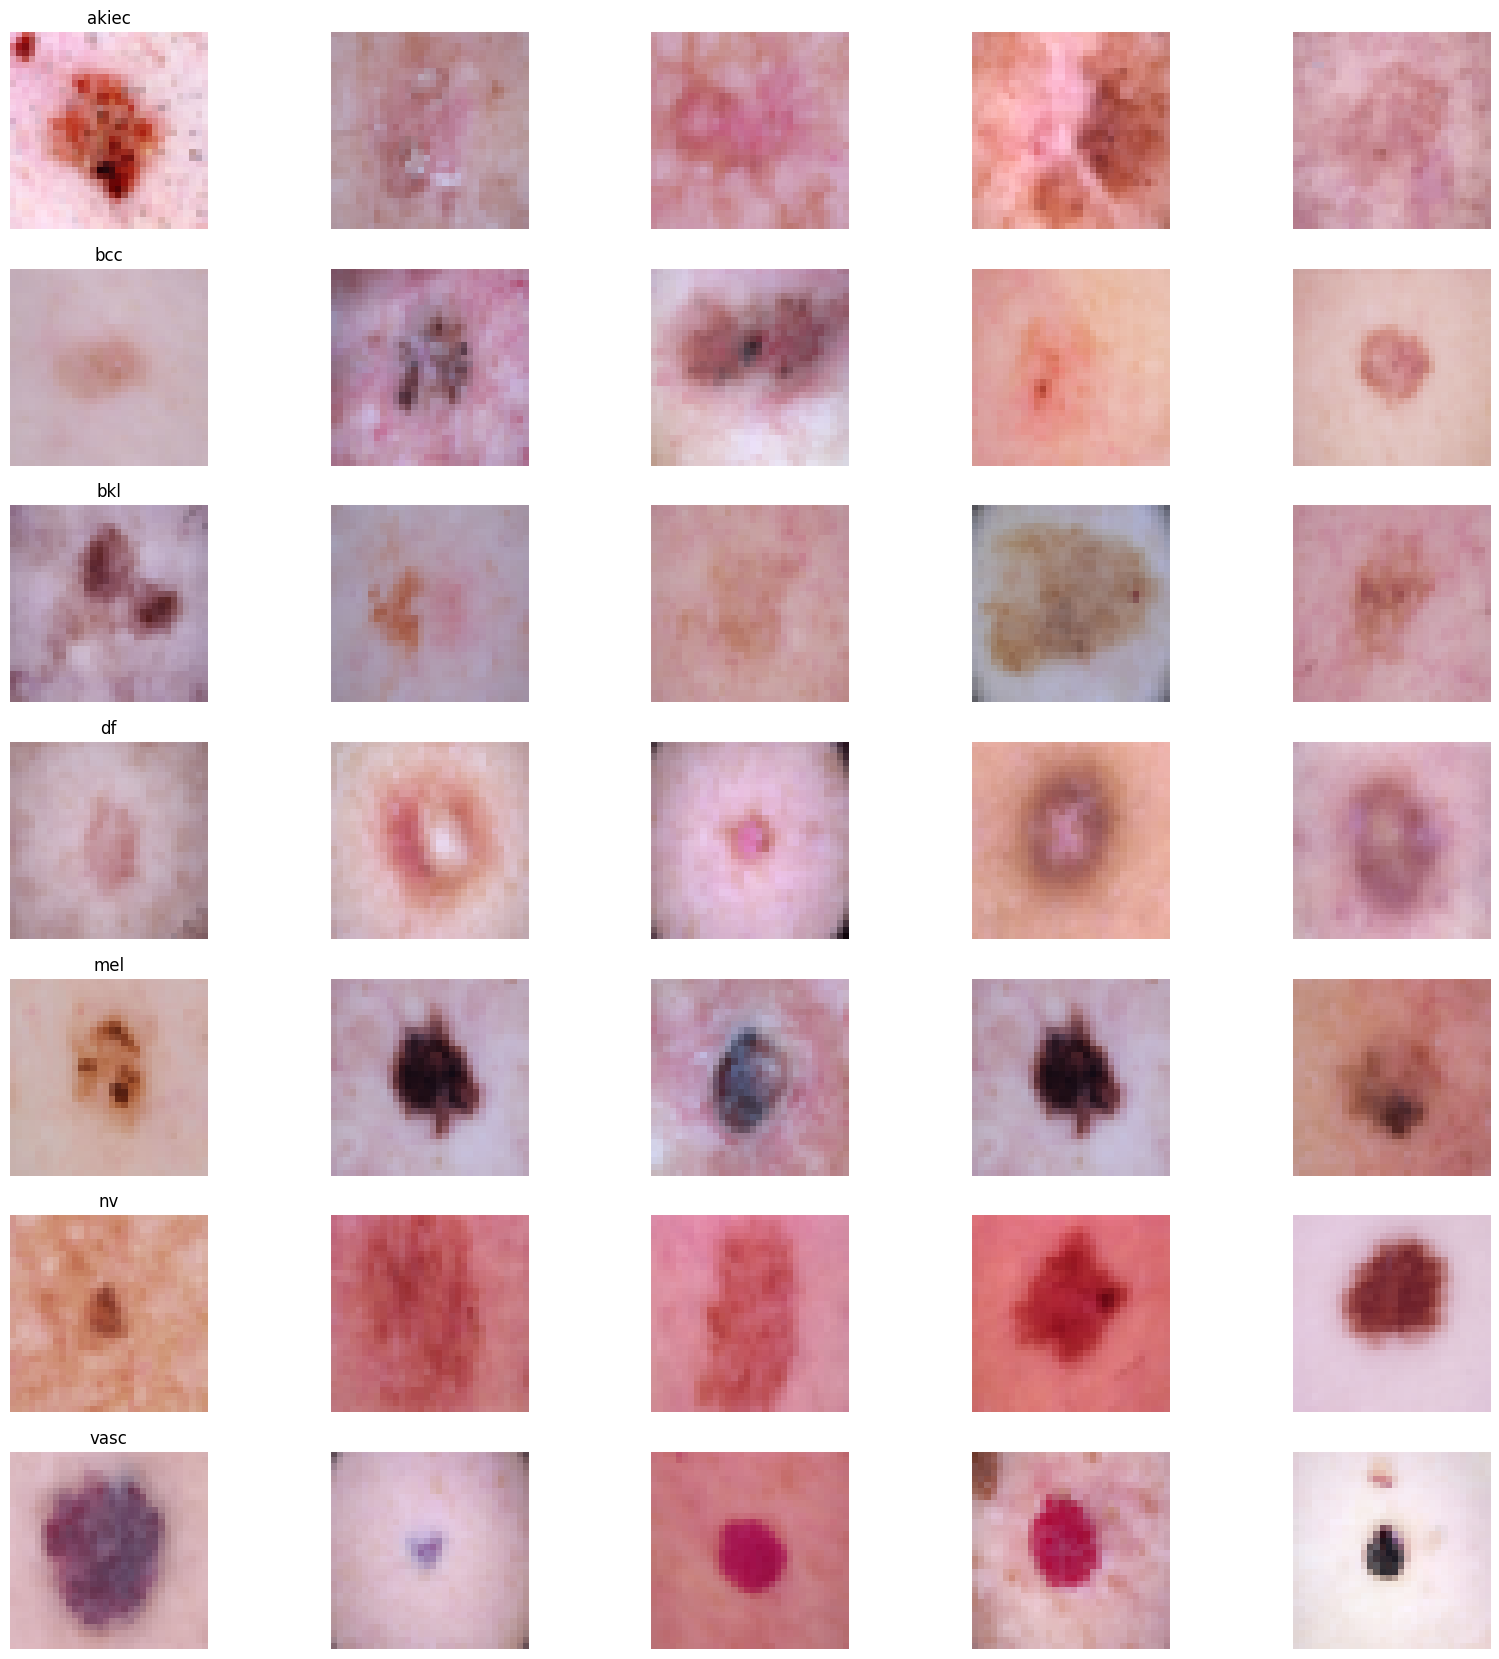

In [10]:
n_samples = 5  

# Plot
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         skin_df_balanced.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

In [11]:
#Convert dataframe column of images into numpy array
X = np.asarray(skin_df_balanced['image'].tolist())
X = X/255.  # Scale values to 0-1
Y=skin_df_balanced['label']  #Assign label values to Y
Y_cat = to_categorical(Y, num_classes=7) #Convert to categorical as this is a multiclass classification problem
#Split to training and testing
x_train, x_test, y_train, y_test = train_test_split(X, Y_cat, test_size=0.25, random_state=42)


In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
#Define the model
num_classes = 7

model = Sequential()
model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(SIZE, SIZE, 3)))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(32))
model.add(Dense(7, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 256)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 128)         0

In [23]:
# Train

batch_size = 16 
epochs = 100

history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size = batch_size,
    validation_data=(x_test, y_test),
    verbose=2)

score = model.evaluate(x_test, y_test)
print('Test accuracy:', score[1])


Epoch 1/100
165/165 - 18s - loss: 0.2130 - acc: 0.9257 - val_loss: 1.0344 - val_acc: 0.7806 - 18s/epoch - 109ms/step
Epoch 2/100
165/165 - 27s - loss: 0.1682 - acc: 0.9440 - val_loss: 1.1669 - val_acc: 0.7703 - 27s/epoch - 166ms/step
Epoch 3/100
165/165 - 30s - loss: 0.1849 - acc: 0.9379 - val_loss: 1.0457 - val_acc: 0.7931 - 30s/epoch - 183ms/step
Epoch 4/100
165/165 - 30s - loss: 0.1422 - acc: 0.9497 - val_loss: 1.0189 - val_acc: 0.7794 - 30s/epoch - 181ms/step
Epoch 5/100
165/165 - 31s - loss: 0.1650 - acc: 0.9444 - val_loss: 1.0653 - val_acc: 0.7886 - 31s/epoch - 188ms/step
Epoch 6/100
165/165 - 32s - loss: 0.1711 - acc: 0.9410 - val_loss: 0.9743 - val_acc: 0.7943 - 32s/epoch - 191ms/step
Epoch 7/100
165/165 - 31s - loss: 0.1800 - acc: 0.9368 - val_loss: 0.9831 - val_acc: 0.7829 - 31s/epoch - 185ms/step
Epoch 8/100
165/165 - 31s - loss: 0.1539 - acc: 0.9486 - val_loss: 1.0305 - val_acc: 0.7851 - 31s/epoch - 187ms/step
Epoch 9/100
165/165 - 27s - loss: 0.1822 - acc: 0.9364 - val_los

Epoch 71/100
165/165 - 30s - loss: 0.1325 - acc: 0.9539 - val_loss: 1.0738 - val_acc: 0.7794 - 30s/epoch - 179ms/step
Epoch 72/100
165/165 - 30s - loss: 0.1277 - acc: 0.9531 - val_loss: 1.1262 - val_acc: 0.7760 - 30s/epoch - 181ms/step
Epoch 73/100
165/165 - 29s - loss: 0.1171 - acc: 0.9585 - val_loss: 1.1772 - val_acc: 0.7783 - 29s/epoch - 178ms/step
Epoch 74/100
165/165 - 27s - loss: 0.1535 - acc: 0.9455 - val_loss: 1.1282 - val_acc: 0.7829 - 27s/epoch - 163ms/step
Epoch 75/100
165/165 - 21s - loss: 0.1538 - acc: 0.9524 - val_loss: 1.0716 - val_acc: 0.7851 - 21s/epoch - 127ms/step
Epoch 76/100
165/165 - 20s - loss: 0.1362 - acc: 0.9554 - val_loss: 1.1270 - val_acc: 0.7749 - 20s/epoch - 119ms/step
Epoch 77/100
165/165 - 23s - loss: 0.1845 - acc: 0.9448 - val_loss: 1.0155 - val_acc: 0.7851 - 23s/epoch - 140ms/step
Epoch 78/100
165/165 - 22s - loss: 0.1875 - acc: 0.9425 - val_loss: 0.9365 - val_acc: 0.8034 - 22s/epoch - 131ms/step
Epoch 79/100
165/165 - 21s - loss: 0.1435 - acc: 0.9516 

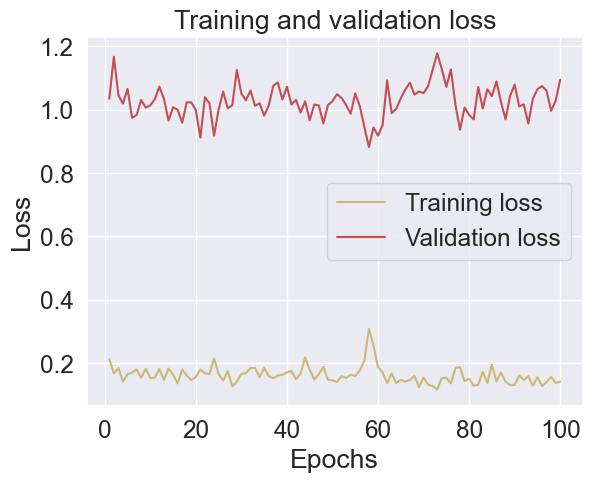

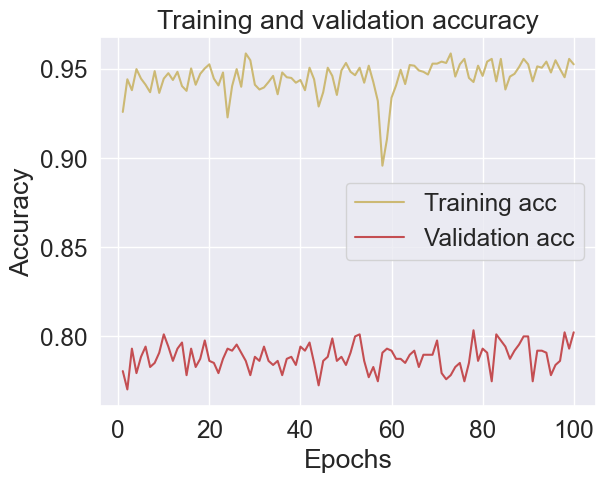

In [24]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
# Prediction on test data
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred, axis = 1) 
# Convert test data to one hot vectors
y_true = np.argmax(y_test, axis = 1) 

28/28 [==============================] - 1s 40ms/step


<Axes: >

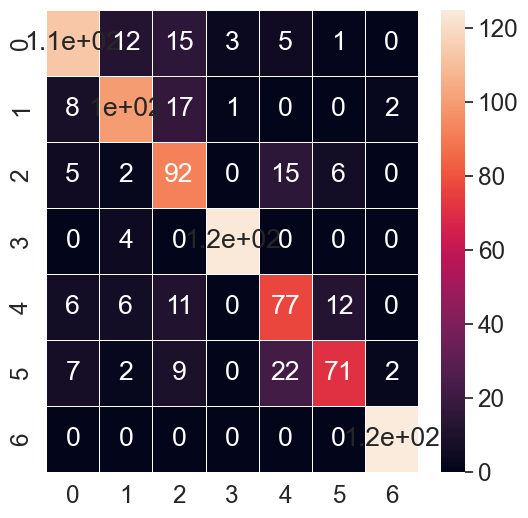

In [26]:
from sklearn.metrics import confusion_matrix
#Print confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)